In [1]:
from misc_functions import *

In [2]:
# Get params
target_example = 0 # 0:snake 1:dog 2:spider
(original_image, prep_img, target_class, file_name_to_export, pretrained_model) =\
    get_example_params(target_example)

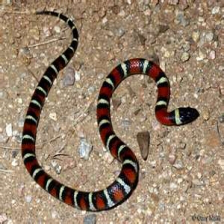

In [3]:
original_image # input image

## Vanilla Backpropagation

In [4]:
from vanilla_backprop import *

In [5]:
# Vanilla backprop
VBP = VanillaBackprop(pretrained_model)
# Generate gradients
vanilla_grads = VBP.generate_gradients(prep_img, target_class)
# Convert to grayscale
grayscale_vanilla_grads = convert_to_grayscale(vanilla_grads)
# Save grayscale gradients
gradient_image = show_gradient_images(grayscale_vanilla_grads)
print('Vanilla backprop completed')

Vanilla backprop completed


/home/bruno/.local/lib/python3.6/site-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


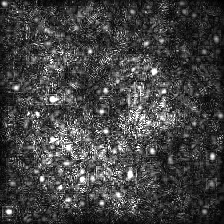

In [6]:
display(gradient_image) # gradient of input

## guided backprop

In [7]:
from guided_backprop import *

In [8]:
# Guided backprop
GBP = GuidedBackprop(pretrained_model)
# Get gradients
guided_grads = GBP.generate_gradients(prep_img, target_class)
# Convert to grayscale
grayscale_guided_grads = convert_to_grayscale(guided_grads)
# Save grayscale gradients
gradient_image = show_gradient_images(grayscale_guided_grads)
# # Positive and negative saliency maps
# pos_sal, neg_sal = get_positive_negative_saliency(guided_grads)
# gradient_image_pos = show_gradient_images(pos_sal)
# gradient_image_neg = show_gradient_images(neg_sal)

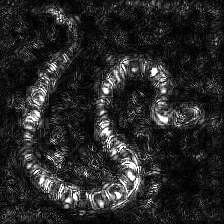

In [9]:
display(gradient_image) # guided gradient of input

## inverted representation

In [10]:
from inverted_representation import *

Iteration: 0 Loss: 0.058795135
Iteration: 5 Loss: 0.06170909
Iteration: 10 Loss: 0.062355053
Iteration: 15 Loss: 0.062666595
Iteration: 20 Loss: 0.06326421
Iteration: 25 Loss: 0.06386124
Iteration: 30 Loss: 0.06385397
Iteration: 35 Loss: 0.06378886
Iteration: 40 Loss: 0.0639609
Iteration: 45 Loss: 0.06395503
done.


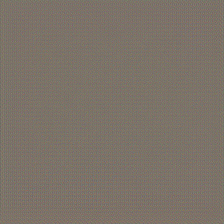

In [11]:
inverted_representation = InvertedRepresentation(pretrained_model)
image_size = 224  # width & height
target_layer = 10 # try increasing with this parameter
inverted_representation.generate_inverted_image_specific_layer(prep_img,
                                                               image_size,
                                                               target_layer)

## Deep Dream

In [12]:
from deep_dream import *

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /home/bruno/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth



Iteration: 1 Loss: 2.41
Iteration: 2 Loss: -0.83
Iteration: 3 Loss: -4.32
Iteration: 4 Loss: -8.85
Iteration: 5 Loss: -11.96
Iteration: 6 Loss: -16.94
Iteration: 7 Loss: -21.60
Iteration: 8 Loss: -23.74
Iteration: 9 Loss: -31.00
Iteration: 10 Loss: -35.62
done


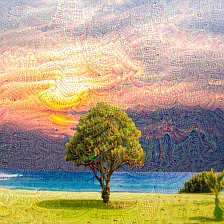

In [13]:
cnn_layer = 34
filter_pos = 94

im_path = './input_images/dd_tree.jpg'
# Fully connected layer is not needed
pretrained_model = models.vgg19(pretrained=True).features
dd = DeepDream(pretrained_model, cnn_layer, filter_pos, im_path)
# This operation can also be done without Pytorch hooks
# See layer visualisation for the implementation without hooks
dd.dream()